In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import xgboost as xgb
import os

In [ ]:
# Install the Kaggle library
!pip install -q kaggle

# Use Colab's file uploader
from google.colab import files
print("Please upload the kaggle.json file you downloaded from your Kaggle account.")
files.upload()

# Create a directory for the Kaggle API configuration
!mkdir -p ~/.kaggle
# Move the uploaded kaggle.json to the required directory
!cp kaggle.json ~/.kaggle/
# Set the correct permissions for the file
!chmod 600 ~/.kaggle/kaggle.json

print("\nKaggle API configured successfully.")

Please upload the kaggle.json file you downloaded from your Kaggle account.


Saving kaggle.json to kaggle.json

Kaggle API configured successfully.


In [ ]:
# Download the dataset from the 'house-prices-advanced-regression-techniques' competition
!kaggle competitions download -c house-prices-advanced-regression-techniques

# Unzip the downloaded files
!unzip -o house-prices-advanced-regression-techniques.zip

print("\nDataset downloaded and unzipped.")

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 542MB/s]
Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               

Dataset downloaded and unzipped.


In [ ]:
train_df=pd.read_csv('/content/train.csv')
test_df=pd.read_csv('/content/test.csv')

In [ ]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220


In [ ]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
train_df.set_index('Id',inplace=True)
test_df.set_index('Id',inplace=True)

print(f"Training Data shape: {train_df.shape}")
print(f"Testing Data shape: {test_df.shape}")

Training Data shape: (1460, 80)
Testing Data shape: (1459, 79)


In [ ]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


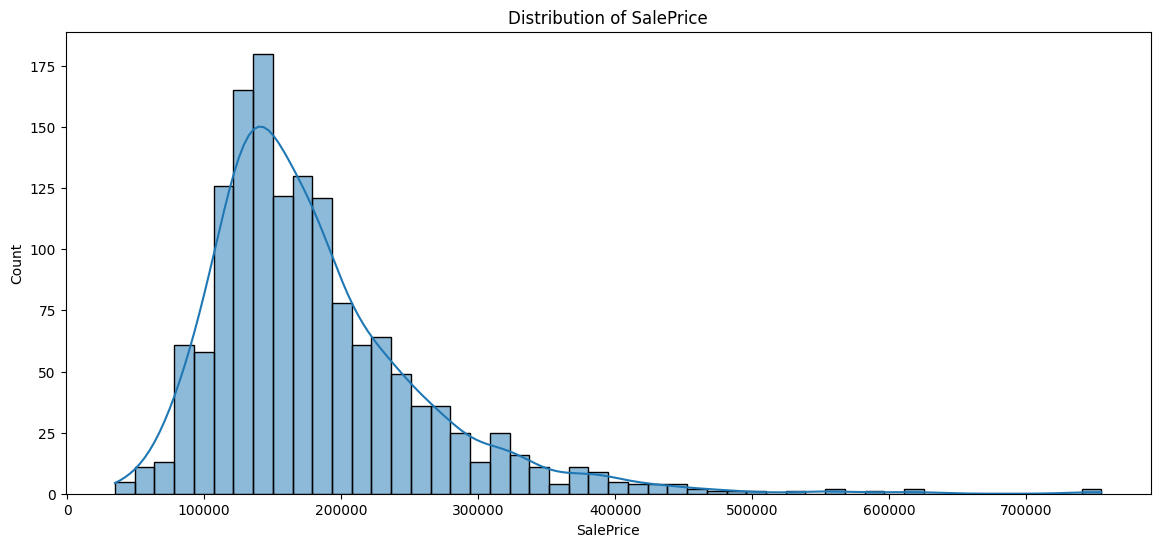

Skewness of SalePrice: 1.8828757597682129


In [ ]:
plt.figure(figsize=(14,6))
sns.histplot(train_df['SalePrice'],kde=True,bins=50)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.show()

print(f"Skewness of SalePrice: {train_df['SalePrice'].skew()}")

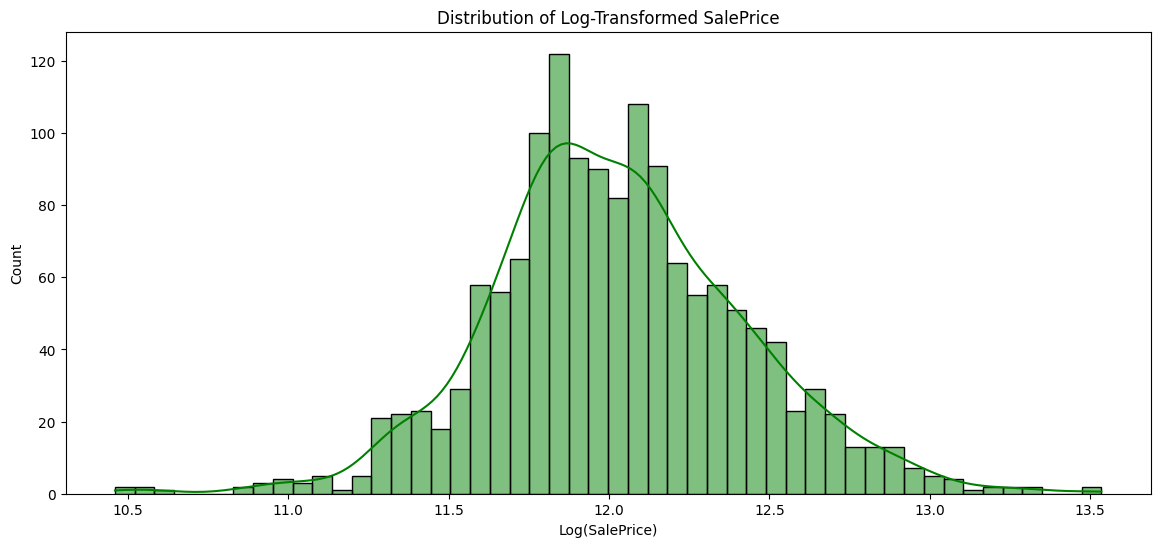

Skewness of Log-Transformed SalePrice: 0.12134661989685333


In [ ]:
train_df['SalePrice']=np.log1p(train_df['SalePrice'])

plt.figure(figsize=(14,6))
sns.histplot(train_df['SalePrice'],kde=True,bins=50,color='green')
plt.title('Distribution of Log-Transformed SalePrice')
plt.xlabel('Log(SalePrice)')
plt.show()

print(f"Skewness of Log-Transformed SalePrice: {train_df['SalePrice'].skew()}")

In [ ]:
corrmat=train_df.corr(numeric_only=True)
top_corr_features=corrmat.nlargest(10,'SalePrice')['SalePrice'].index
top_corr_mat=train_df[top_corr_features].corr()


In [ ]:
corrmat

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.073959
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.355879
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.257320
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.817185
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.036868
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.586570
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.565608
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.430809
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.372023
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,0.004832


In [ ]:
top_corr_mat

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,YearRemodAdd
SalePrice,1.000000,0.817185,0.700927,0.680625,0.650888,0.612134,0.596981,0.594771,0.586570,0.565608
OverallQual,0.817185,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.550600,0.572323,0.550684
GrLivArea,0.700927,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.630012,0.199010,0.287389
GarageCars,0.680625,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.469672,0.537850,0.420622
GarageArea,0.650888,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.405656,0.478954,0.371600
TotalBsmtSF,0.612134,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.323722,0.391452,0.291066
1stFlrSF,0.596981,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.380637,0.281986,0.240379
FullBath,0.594771,0.550600,0.630012,0.469672,0.405656,0.323722,0.380637,1.000000,0.468271,0.439046
YearBuilt,0.586570,0.572323,0.199010,0.537850,0.478954,0.391452,0.281986,0.468271,1.000000,0.592855
YearRemodAdd,0.565608,0.550684,0.287389,0.420622,0.371600,0.291066,0.240379,0.439046,0.592855,1.000000


In [ ]:
top_corr_features

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd'],
      dtype='object')

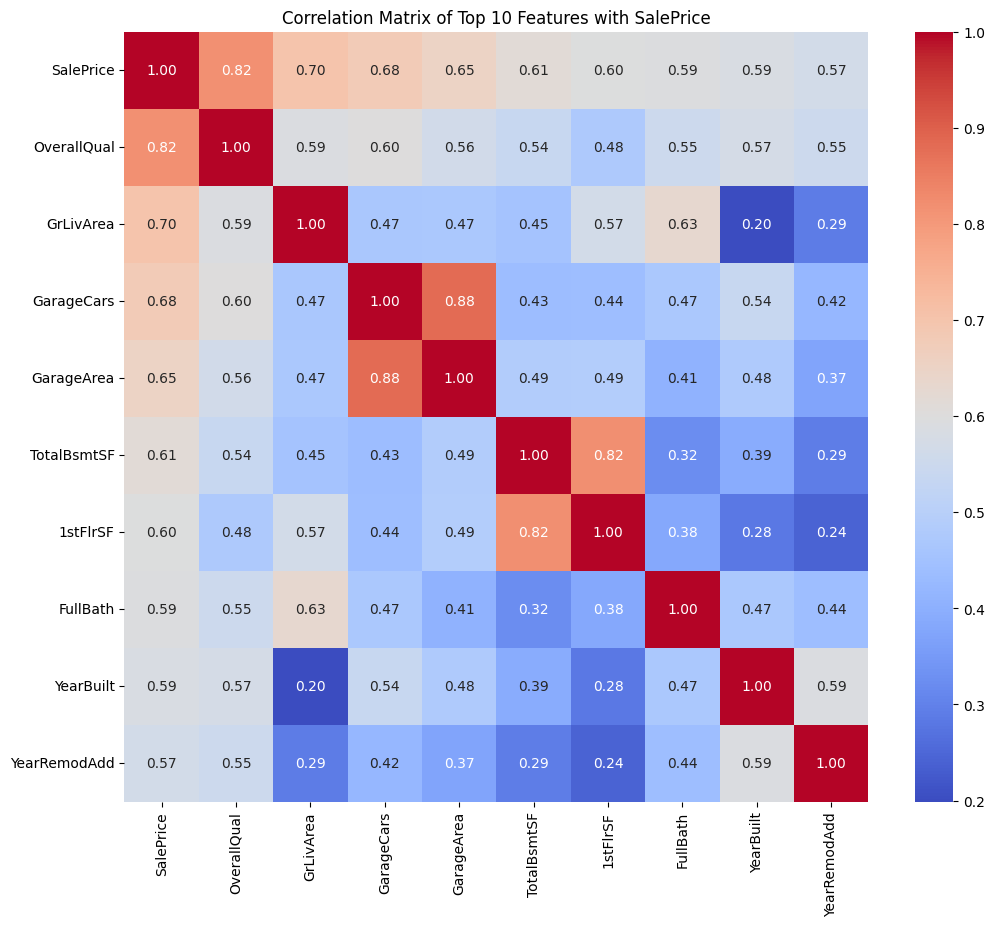

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(top_corr_mat,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix of Top 10 Features with SalePrice')
plt.show()

In [ ]:
all_data = pd.concat((train_df.loc[:,:'SaleCondition'],
                      test_df.loc[:,:'SaleCondition']))
print('Combined Data Shape : ',all_data.shape)

Combined Data Shape :  (2919, 79)


In [ ]:
missing_data = all_data.isnull().sum().sort_values(ascending=False)
missing_data = missing_data[missing_data > 0]

print('Features with missing values:-')
print(missing_data)

Features with missing values:-
PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
MasVnrType      1766
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageFinish     159
GarageYrBlt      159
GarageQual       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
Functional         2
BsmtFullBath       2
Utilities          2
Exterior1st        1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF1         1
SaleType           1
KitchenQual        1
GarageCars         1
GarageArea         1
Electrical         1
Exterior2nd        1
BsmtFinSF2         1
dtype: int64


In [ ]:
numerical_cols_to_impute_zero = ['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageCars', 'GarageArea', 'BsmtFullBath', 'BsmtHalfBath']
for col in numerical_cols_to_impute_zero:
    if col in all_data.columns:
      all_data[col] = all_data[col].fillna(0)

In [ ]:
all_data[numerical_cols_to_impute_zero].isnull().sum()

,0
MasVnrArea,0
BsmtFinSF1,0
BsmtFinSF2,0
BsmtUnfSF,0
TotalBsmtSF,0
GarageCars,0
GarageArea,0
BsmtFullBath,0
BsmtHalfBath,0


In [ ]:
all_data['LotFrontage'].isnull().sum()

np.int64(486)

In [ ]:
all_data['LotFrontage'].isnull().any()

np.True_

In [ ]:
if 'LotFrontage' in all_data.columns and all_data['LotFrontage'].isnull().any():
  all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))

In [ ]:
all_data['Alley'].value_counts()

,count
Alley,
Grvl,120
Pave,78


In [ ]:
all_data['Alley'].isnull().sum()

np.int64(2721)

In [ ]:
all_data['Fence'].isnull().sum()

np.int64(2348)

In [ ]:
categorical_features_to_impute_none = ['Alley', 'Fence', 'MiscFeature', 'PoolQC', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']
for col in categorical_features_to_impute_none:
  if col in all_data.columns:
    all_data[col] = all_data[col].fillna("None")

for col in ['Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType', 'Utilities', 'Functional', 'MSZoning']:
  if col in all_data.columns:
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

In [ ]:
all_data[categorical_features_to_impute_none].isnull().sum()

,0
Alley,0
Fence,0
MiscFeature,0
PoolQC,0
FireplaceQu,0
GarageType,0
GarageFinish,0
GarageQual,0
GarageCond,0
BsmtQual,0


In [ ]:
more_categorical_features_to_impute_none=['Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType', 'Utilities', 'Functional', 'MSZoning']
all_data[more_categorical_features_to_impute_none].isnull().sum()

,0
Electrical,0
KitchenQual,0
Exterior1st,0
Exterior2nd,0
SaleType,0
Utilities,0
Functional,0
MSZoning,0


In [ ]:
all_data.isnull().sum()

,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
Street,0
...,...
MiscVal,0
MoSold,0
YrSold,0
SaleType,0


In [ ]:
all_data['GarageYrBlt'].isnull().sum()

np.int64(159)

In [ ]:
if 'GarageYrBlt' in all_data.columns and all_data['GarageYrBlt'].isnull().any():
  all_data['GarageYrBlt'] = all_data['GarageYrBlt'].fillna(0)

In [ ]:
print("\nMissing values after all imputations: ",all_data.isnull().sum().sum())


Missing values after all imputations:  0


## Feature Engineering

In [ ]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

all_data['TotalBath'] = (all_data['BsmtFullBath'] + (0.5*all_data['BsmtHalfBath']) + all_data['FullBath'] + (0.5*all_data['HalfBath']))

all_data['Age'] = all_data['YrSold'] - all_data['YearBuilt']

In [ ]:
categorical_features=all_data.select_dtypes(include=['object']).columns
all_data = pd.get_dummies(all_data,columns=categorical_features,drop_first=True)

print(f"Data shape after encoding: {all_data.shape}")

Data shape after encoding: (2919, 262)


In [ ]:
all_data.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,False,False,False,False,True,False,False,False,True,False
2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,False,False,False,False,True,False,False,False,True,False
3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,False,False,False,False,True,False,False,False,True,False
4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,False,False,False,False,True,False,False,False,False,False
5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,False,False,False,False,True,False,False,False,True,False


# Model building

In [ ]:
# Separate the preprocessed data back into training and testing sets

X = all_data[:len(train_df)]
y = train_df['SalePrice']
X_test_final = all_data[len(train_df):]

In [ ]:
# Split the training data for validation
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)

## Feature Scaling


In [ ]:
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_val_scaled=scaler.transform(X_val)
X_test_final_scaled=scaler.transform(X_test_final)

In [ ]:
X_train_scaled

array([[-0.8667643 , -0.01933867, -0.21289571, ..., -0.12510865,
         0.46001984, -0.30263639],
       [ 0.07410996, -0.50039047, -0.26524463, ..., -0.12510865,
         0.46001984, -0.30263639],
       [-0.63154574, -0.15053462, -0.17784146, ..., -0.12510865,
         0.46001984, -0.30263639],
       ...,
       [-0.8667643 , -0.45665849, -0.23409563, ..., -0.12510865,
         0.46001984, -0.30263639],
       [-0.16110861, -0.6753184 , -0.28337613, ..., -0.12510865,
         0.46001984, -0.30263639],
       [ 1.48542135, -0.76278236, -0.65139925, ..., -0.12510865,
         0.46001984, -0.30263639]])

In [ ]:
X_val_scaled

array([[-0.8667643 , -0.01933867, -0.21159396, ..., -0.12510865,
         0.46001984, -0.30263639],
       [ 0.07410996,  1.20515682,  0.14564323, ..., -0.12510865,
         0.46001984, -0.30263639],
       [-0.63154574, -0.63158642, -0.16082574, ..., -0.12510865,
         0.46001984, -0.30263639],
       ...,
       [ 0.07410996, -0.32546254, -0.23158511, ..., -0.12510865,
         0.46001984, -0.30263639],
       [ 0.30932853, -0.45665849, -0.14929596, ..., -0.12510865,
         0.46001984, -0.30263639],
       [-0.8667643 , -0.01933867, -0.2389307 , ..., -0.12510865,
         0.46001984, -0.30263639]])

In [ ]:
X_test_final_scaled

array([[-0.8667643 ,  0.41798115,  0.08669258, ..., -0.12510865,
         0.46001984, -0.30263639],
       [-0.8667643 ,  0.46171313,  0.33263021, ..., -0.12510865,
         0.46001984, -0.30263639],
       [ 0.07410996,  0.15558926,  0.29199704, ..., -0.12510865,
         0.46001984, -0.30263639],
       ...,
       [-0.8667643 ,  3.9165397 ,  0.86569654, ..., -0.12510865,
        -2.17381926, -0.30263639],
       [ 0.66215637, -0.36919453, -0.02311926, ..., -0.12510865,
         0.46001984, -0.30263639],
       [ 0.07410996,  0.15558926, -0.09880669, ..., -0.12510865,
         0.46001984, -0.30263639]])

In [ ]:
lr=LinearRegression()
lr.fit(X_train_scaled,y_train)
y_pred_lr=lr.predict(X_val_scaled)

In [ ]:
y_pred_lr

array([11.94136732, 12.73981795, 11.51734525, 12.01487948, 12.64926257,
       11.28125177, 12.42367424, 11.89852165, 11.22643455, 11.86994258,
       11.88608842, 11.64392657, 11.23230401, 12.26138536, 12.07110195,
       11.80087308, 12.14706831, 11.78972384, 11.58284822, 12.2693948 ,
       11.92793845, 12.22406554, 12.07011723, 11.82560994, 12.19616524,
       11.89526696, 12.15166979, 11.60271912, 12.10684603, 12.1969508 ,
       12.08657634, 12.53744901, 12.30214298, 11.66556937, 12.45474616,
       11.93105985, 11.89189847, 12.19935819, 12.68351764, 11.58686028,
       11.80931906, 12.29662339, 11.60207364, 12.82646513, 11.75787557,
       11.74918942, 11.57708431, 11.81620749, 13.04562787, 11.8267837 ,
       11.7062313 , 12.24629524, 11.5574877 , 12.6258775 , 12.0258037 ,
       12.38911243, 12.22142841, 11.95688407, 11.78095167, 11.50236687,
       11.30197603, 11.9977707 , 12.64750084, 12.40696689, 12.60854943,
       12.19663563, 11.60748068, 12.68077664, 11.77433401, 12.06

In [ ]:
lr.fit_intercept

True

In [ ]:
lr.coef_

array([-2.09426725e-02,  4.16021691e-03,  2.40781882e-02,  5.53591559e-02,
        3.93324932e-02,  3.01594753e-02,  2.38135219e-02,  5.28085809e-03,
        2.14630499e-02,  5.67671094e-03, -2.72644873e-03,  2.16354444e-02,
        2.80841118e-02,  3.34268667e-02,  1.03802538e-02,  4.96727023e-02,
        7.66261292e-03,  3.47325563e-04,  1.51703781e-03,  1.03971082e-02,
        1.15639536e-02, -1.17046923e-02,  5.56443351e-03,  1.18856129e-02,
       -1.33359536e-01,  6.72423051e-03,  3.30838510e-02,  1.16170312e-02,
        8.69962871e-04,  6.13399888e-03,  6.44675848e-03,  1.17926969e-02,
        1.75197356e-01,  1.51322120e-03, -1.19042681e-03, -2.20846413e-03,
        4.27211853e-02,  9.56262203e-03, -3.02274861e-02,  7.31693443e-02,
        3.91993708e-02,  1.32320208e-01,  1.06399598e-01,  2.65328253e-03,
       -5.13885293e-03,  1.80643519e-03,  5.87998887e-03,  2.33778673e-03,
        2.73877198e-03,  7.33735272e-03,  2.20732328e-04,  8.56539139e-03,
       -6.57129401e-03,  

In [ ]:
xgbr = xgb.XGBRegressor(objective='reg:squarederror', # Corrected objective function
                        n_estimators=1000,
                        learning_rate=0.05,
                        max_depth=3,
                        min_child_weight=1,
                        subsample=0.8,
                        colsample_bytree=0.8,
                        random_state=42)

xgbr.fit(X_train,y_train)
y_pred_xgbr=xgbr.predict(X_val)

In [ ]:
def evaluate(y_true,y_pred,model_name):
  rmse=np.sqrt(mean_squared_error(y_true,y_pred))
  mae=mean_absolute_error(y_true,y_pred)
  r2=r2_score(y_true,y_pred)
  print(f"--- {model_name} Performance ---")
  print(f"RMSE: {rmse:.4f}")
  print(f"MAE: {mae:.4f}")
  print(f"R-squared error: {r2:.4f}")

In [ ]:
evaluate(y_val,y_pred_lr,'Linear Regression')

--- Linear Regression Performance ---
RMSE: 0.1734
MAE: 0.0960
R-squared error: 0.8389


In [ ]:
evaluate(y_val,y_pred_xgbr,"XGBoost")

--- XGBoost Performance ---
RMSE: 0.1315
MAE: 0.0858
R-squared error: 0.9073
